# Introduction

One of the companies engaged in the insurance sector is experiencing difficulties in overcome and control the number of fraud cases. You as a data scientist who working in one of the leading management consultants asked to do automation on fraud detection. You are given a dataset with the following metadata:
* months_as_customer: the length of time a user has been a customer in a matter of months
* age: customer age
* policy_number: policy number
* policy_bind_date: policy date
* policy_state: policy area, state
* policy_csl: Combined single limit policy
* policy_deductable: shared risk
* policy_annual_premium: annual premium
* umbrella_limit: risk payment limit by insurance company
* insured_zip: customer zip code
* insured_sex: client's gender
* insured_education_level: customer education level
* insured_occupation: customer's job
* insured_hobbies: customer's hobbies
* insured_relationship: customer relationship status
* capital-gains: large gains obtained from compensation
* capital-loss: the amount of loss obtained from compensation
* incident_date: the date the incident occurred
* incident_type: incident type
* collision_type: collision type
* incident_severity: behavior severity
* authorities_contacted: authorities to contact
* incident_state: incident location, state
* incident_city: the city where the incident occurred
* incident_location: the location where the incident occurred
* incident_hour_of_the_day: the time the incident occurred
* number_of_vehicles_involved: number of vehicles involved in the incident
* property_damage: is there any property damage? YES if yes
* bodily_injuries: number of injured
* witness: number of eye witnesses
* police_report_available: is there a police report? YES if yes
* total_claim_amount: total claims
* injury_claim: claim for injuries
* property_claim: claim for property damage
* vehicle_claim: claim for car damage
* auto_make: automotive brand
* auto_model: automotive model
* auto_year: year of car manufacture
* fraud_reported: was it reported as fraud? Y if Yes

# Install Package

In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime
!pip install skope-rules

     |████████████████████████████████| 1.0 MB 6.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=3b7c42cc003c58f2c33c48eed23c5e9070070260822f7b7108743c91c5c5994e
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 564 kB 8.1 MB/s 
     |████████████████████████████████| 216 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 49.5 MB/s 
  Crea

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import warnings

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import seaborn for data visualization
import seaborn as sns
import plotly.express as px
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Load Tree Visualization
from sklearn.tree import plot_tree, export_text
# Load Metrics
from sklearn.metrics import *
# Load Grid Search
from sklearn.model_selection import GridSearchCV

# import xgboost classifier
from xgboost import XGBClassifier
from scipy import sparse
import xgboost as xgb
from random import *

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# Load PreProcessing Module
from sklearn.preprocessing import *

# Load Rulefit Model
from skrules import SkopeRules

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# Load Dataset

In [ ]:
# load customer dataset
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")

In [ ]:
# check the data
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Data Inspection

In [ ]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
## check data dimension
df.shape

(1000, 39)

In [ ]:
# removes row with na values
df.isna().sum()
df = df.dropna()

In [ ]:
# Unique Value for Datatype Object Columns
empDfObj = pd.DataFrame(df, columns=['policy_state','policy_deductable','insured_sex','insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model','fraud_reported'])
print("Contents of the Data: ")
print(empDfObj)

# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = empDfObj.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

# Unique Value for Datatype Object Columns
# Get unique elements in multiple columns 
unique = pd.unique(df[['policy_state','policy_deductable','insured_sex','insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model','fraud_reported']].values.ravel('k'))
print('Unique elements in object columns :')
print(unique)

Contents of the Data: 
    policy_state  policy_deductable insured_sex insured_education_level  \
0             OH               1000        MALE                      MD   
1             IN               2000        MALE                      MD   
2             OH               2000      FEMALE                     PhD   
3             IL               2000      FEMALE                     PhD   
4             IL               1000        MALE               Associate   
..           ...                ...         ...                     ...   
995           OH               1000      FEMALE                 Masters   
996           IL               1000      FEMALE                     PhD   
997           OH                500      FEMALE                 Masters   
998           IL               2000        MALE               Associate   
999           OH               1000      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  \
0         cra

In [ ]:
# typecasting data
df['policy_bind_date']= df.policy_bind_date.astype('datetime64[ns]')
df['incident_date']= df.incident_date.astype('datetime64[ns]')

In [ ]:
# Count '?' in Data
df[df == '?'].count()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [ ]:
# Drop '?' in Data
df = df[df['collision_type'] == '?']
df = df[df['property_damage'] == '?']
df = df[df['police_report_available'] == '?']

In [ ]:
# feature engineering: create 'period_in_days' column with formula: 'incident_date' - 'policy_bind_date'
df['period_in_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days

# feature engineering: create 'period_in_days' column with formula: 'incident_date' - 'policy_bind_date'
df['capital'] = (df['capital-gains'] + df['capital-loss'])

In [ ]:
data = df.drop(["policy_number", "policy_csl", "policy_bind_date", "insured_hobbies", "incident_date", "incident_location", "auto_model", "insured_occupation", "auto_make", "insured_zip", "capital-gains", "capital-loss"], axis = 1)

Pada data ini, tidak teridentifikasi adanya null atau NaN, namun yang perlu diperhatikan adanya nilai "?" yang mungkin bisa diidentifikasi menjadi null sekitar 800 data yang ada pada kolom collision_type, police_report_available dan property_damage. 

Dalam kasus ini, kolom yang memiliki nilai "?" dapat dihapus/didrop seperti collision_type, police_report_available dan property_damage. Hal ini dilakukan karena kolom tersebut juga tidak memiliki dampak yang signifikan untuk dianalisis.

In [ ]:
# Education Encoding
# Change to 1 for All Value with Partner (Married) and 0 for All Value Without Partner (Single and Divorced)
data['insured_education_level'] = data['insured_education_level'].replace({'MD': 'University', 'PhD': 'University', 'College': 'University', 'Masters': 'University', 'JD': 'University', 'Associate':'University'});

# Status Encoding
# Change to 1 for All Value with University Graduated (Graduate, College, Post-Graduate, Doctorate) and 0 for Non-Graduated (High School, Uneducated, Unknown)
data['insured_relationship'] = data['insured_relationship'].replace({'husband': 'Married', 'own-child': 'Single', 'unmarried': 'Single', 'other-relative': 'Single', 'wife': 'Married', 'not-in-family':'Single'});

In [ ]:
# Change Type Data to Numeric
data['insured_sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
data['incident_type'].replace(['Multi-vehicle Collision','Single Vehicle Collision'],[1,0],inplace=True)
data['property_damage'].replace(['YES','NO'],[1,0],inplace=True)
data['police_report_available'].replace(['YES','NO'],[1,0],inplace=True)
data['fraud_reported'].replace(['Y','N'],[1,0],inplace=True)
data['policy_state'].replace(['OH','IL','IN'],[0,1,2],inplace=True)
data['collision_type'].replace(['Front Collision','Side Collision', 'Rear Collision'],[0,1,2],inplace=True)
data['incident_severity'].replace(['Minor Damage','Major Damage', 'Total Loss'],[0,1,2],inplace=True)
data['authorities_contacted'].replace(['Other', 'Police','Fire', 'Ambulance' ],[0,1,2,3],inplace=True)
data['insured_relationship'].replace(['Single','Married'],[0,1],inplace=True)
data['insured_education_level'].replace(['High School','University'],[0,1],inplace=True)
data['incident_state'].replace(['SC', 'NY', 'WV', 'VA', 'OH', 'NC', 'PA'],[0,1,2,3,4,5,6],inplace=True)
data['incident_city'].replace(['Columbus', 'Arlington', 'Springfield', 'Northbend', 'Hillsdale', 'Northbrook', 'Riverwood'],[0,1,2,3,4,5,6],inplace=True)

In [ ]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,incident_type,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,period_in_days,capital
1,228,42,2,2000,1197.22,5000000,1,1,0,Vehicle Theft,...,0,?,5070,780,780,3510,2007,1,3130,0
51,91,27,1,2000,1073.83,0,0,1,1,Vehicle Theft,...,2,?,7260,1320,660,5280,2008,0,7455,0
81,244,40,0,2000,1267.81,5000000,0,1,1,Vehicle Theft,...,1,?,6600,660,1320,4620,2005,0,6392,0
127,165,32,2,500,1399.26,0,0,0,0,Parked Car,...,0,?,3960,330,660,2970,1998,0,979,70500
141,287,41,1,2000,968.74,0,1,1,1,Vehicle Theft,...,3,?,5170,470,940,3760,2001,0,3948,-49000
159,136,29,0,500,1203.24,0,0,1,0,Vehicle Theft,...,0,?,6200,1240,620,4340,1999,0,1743,-4400
199,285,43,0,2000,1512.58,0,0,1,0,Vehicle Theft,...,1,?,2520,280,280,1960,1997,0,7372,47600
211,210,37,2,2000,1048.46,0,1,0,0,Vehicle Theft,...,2,?,7080,1180,590,5310,1999,0,3075,59900
297,247,39,1,500,806.31,0,0,1,1,Parked Car,...,3,?,3300,600,0,2700,2003,0,7750,0
333,101,26,1,1000,1371.88,0,0,1,1,Parked Car,...,2,?,3190,580,580,2030,1995,0,8587,0


# Train-Test Split Data

Split data before data exploration and engineering

In [ ]:
X = data.drop(["fraud_reported"], axis = 1)
y = data["fraud_reported"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

# Data Exploration

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 221 to 399
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           68 non-null     int64  
 1   age                          68 non-null     int64  
 2   policy_state                 68 non-null     int64  
 3   policy_deductable            68 non-null     int64  
 4   policy_annual_premium        68 non-null     float64
 5   umbrella_limit               68 non-null     int64  
 6   insured_sex                  68 non-null     int64  
 7   insured_education_level      68 non-null     int64  
 8   insured_relationship         68 non-null     int64  
 9   incident_type                68 non-null     int64  
 10  collision_type               68 non-null     int64  
 11  incident_severity            68 non-null     int64  
 12  authorities_contacted        68 non-null     int64  
 13  incident_state     

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 246 to 660
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           272 non-null    int64  
 1   age                          272 non-null    int64  
 2   policy_state                 272 non-null    int64  
 3   policy_deductable            272 non-null    int64  
 4   policy_annual_premium        272 non-null    float64
 5   umbrella_limit               272 non-null    int64  
 6   insured_sex                  272 non-null    int64  
 7   insured_education_level      272 non-null    int64  
 8   insured_relationship         272 non-null    int64  
 9   incident_type                272 non-null    int64  
 10  collision_type               272 non-null    int64  
 11  incident_severity            272 non-null    int64  
 12  authorities_contacted        272 non-null    int64  
 13  incident_state    

In [ ]:
X_train["fraud_reported"] = y_train

The Target Distribution

Fraud: 
No (0) 
Yes (1) 


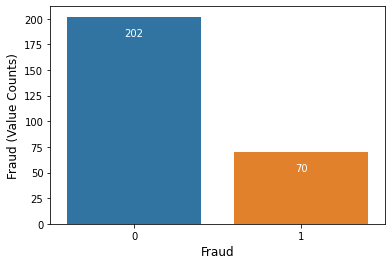

In [ ]:
ax = sns.countplot(x="fraud_reported", data=X_train)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white')

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Fraud (Value Counts)", fontsize=12);

print("Fraud: ")
print("No (0) ")
print("Yes (1) ");

We can observe there imbalance case in our dataset. We can solve this in two ways:

- Post-modeling, by changing classification threhold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do pre-modelling oversampling if necessary

Next we gonna check numerical data distribution and multicolinearity for each variables


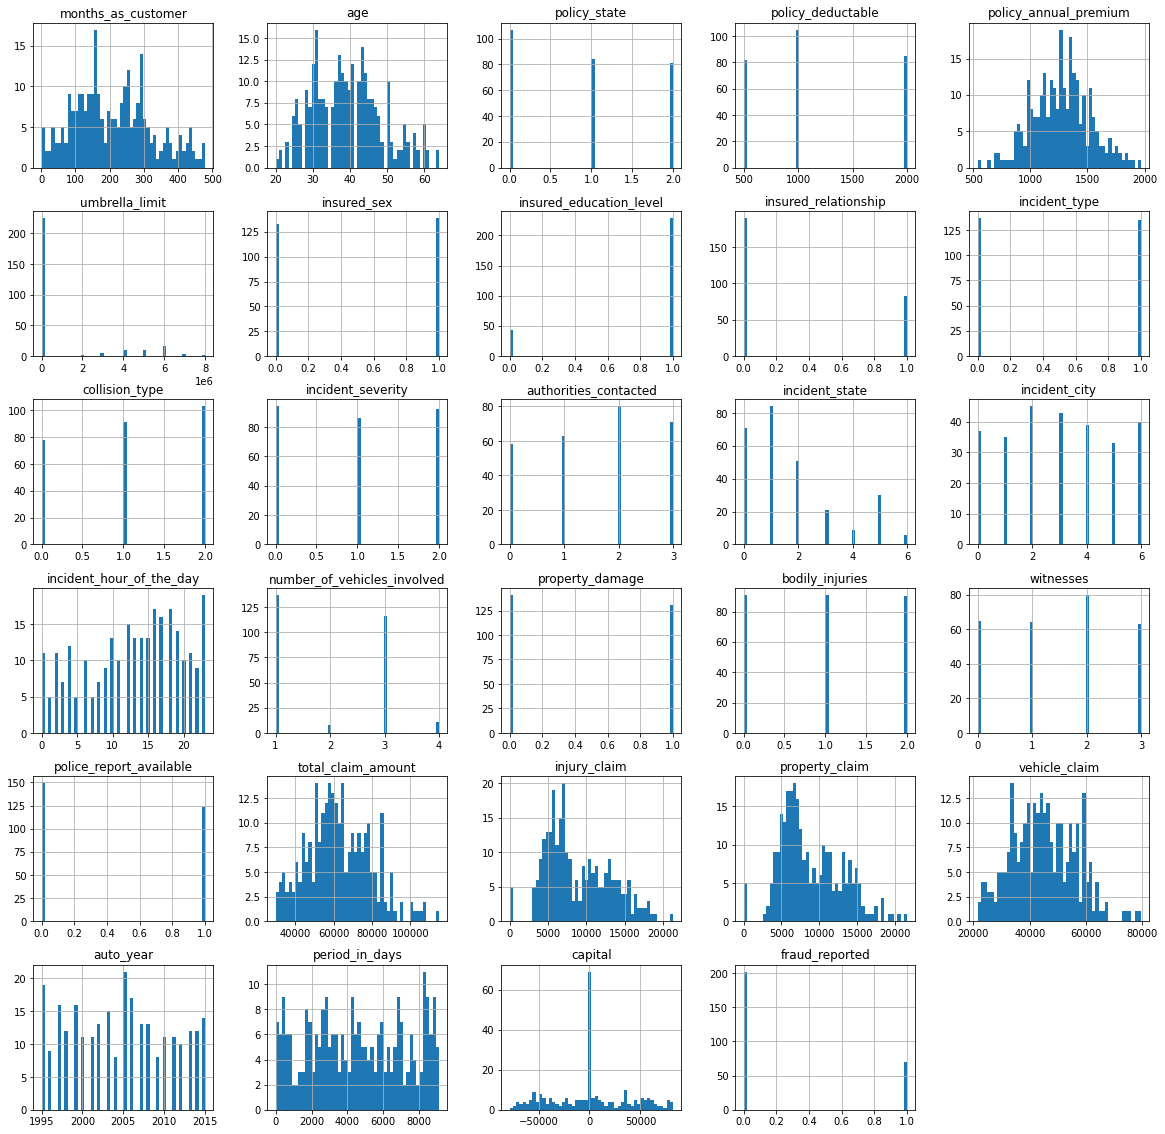

In [ ]:
# check numerical data distribution
X_train.hist(bins=50, figsize = (20, 20));

From the data there is a variable with a numeric type: customer_age, months_on_book, credit_limit, total_revolving_bal, avg_open_to_buy, total_amt_chng_q4_q1, total_trans_amt, total_trans_ct, months_on_book, total_ct_chng_q4_q1 and avg_utilization_ratio
Meanwhile, categorical data include: gender, dependent_count, education_level, marital_status, income_category, card_category, total_relationship_count, months_inactive_12_mon, contacts_count_12_mon and attriction_flag.

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


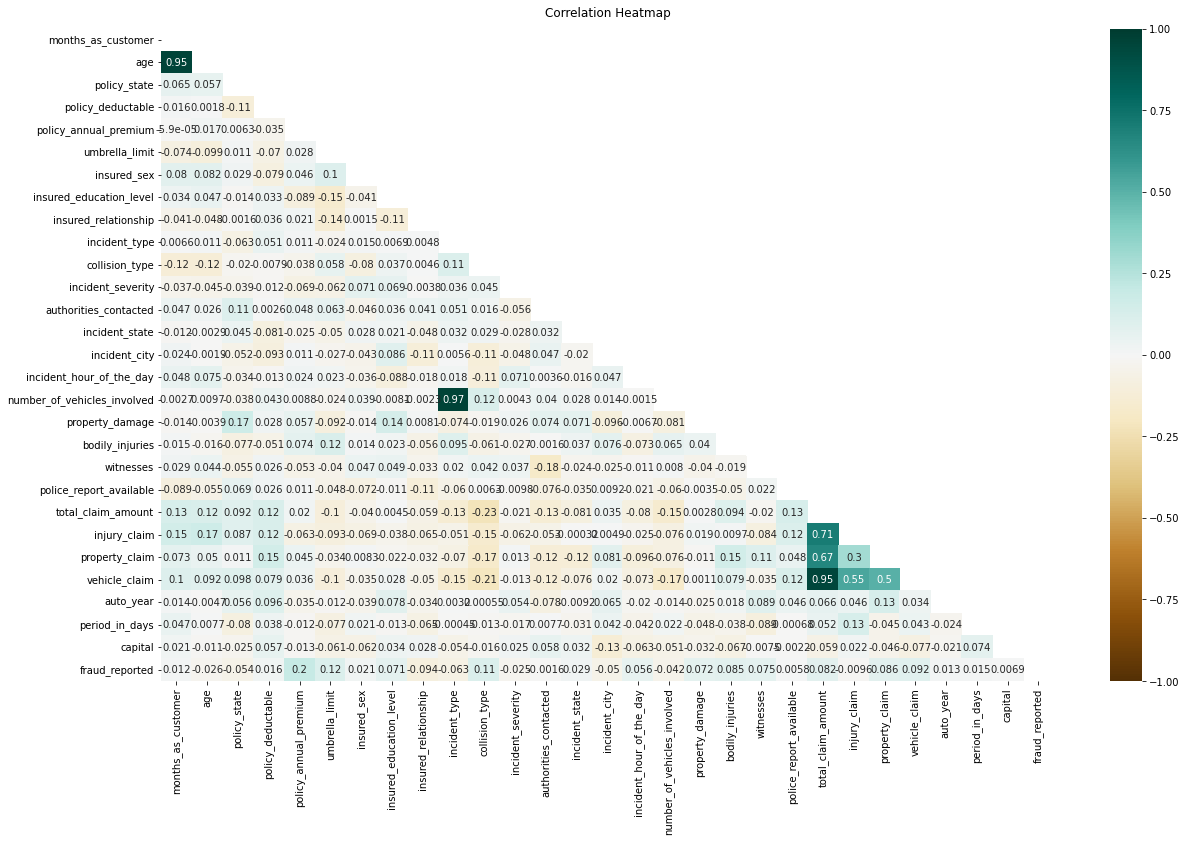

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 12))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We observe multiple multicolinearity between predictor variables such as avg_open_to_buy vs credit_limit (100%), total_trans_ct vs total_trans_ct (81%), months_on_book vs customer_age (79%) and many more.

## Categorical Data vs Attrition Flag

**Income vs Attrition Flag**


In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
ax = sns.countplot(x='fraud_reported', hue='income_category', data=X_train);

plt.legend(title='Income Category', loc='upper left', labels=['Less than $40K (0)','$40K - $60K (1)','$60K - $80K (2)','$80K - $120K (3)','$120K + (4)'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("fraud_reported", fontsize=12)
plt.ylabel("Income Category (Value Counts)", fontsize=12)

print("Attrition Flag: ")
print("Attrited Customer (0) ")
print("Existing Customer (1) ");

ValueError: ignored

jawaban 1b

**Education vs Attrition Flag**


In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
ax = sns.countplot(x='attrition_flag', hue='education_level', data=X_train);

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')


plt.legend(title='Education Level', loc='upper left', labels=['Non-University Graduated (0)','University Graduated (1)'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Attrition Flag", fontsize=12)
plt.ylabel("Education Level (Value Counts)", fontsize=12)

print("Attrition Flag: ")
print("Attrited Customer (0) ")
print("Existing Customer (1) ");

jawaban 1b

**Income vs Education**

In [ ]:
ax = sns.countplot(x='education_level', hue='income_category', data=X_train);
plt.xlabel('Edcuation Level (Value Counts)');

plt.legend(title='Income Category', loc='upper right', labels=['Less than $40K (0)','$40K - $60K (1)','$60K - $80K (2)','$80K - $120K (3)','$120K + (4)'])
plt.xticks(rotation=0, horizontalalignment="center")

# Show the plot
plt.show()

print("Education Level:")
print("Non-University Graduated (0)")
print("University Graduated (1)");

jawaban nmr 1b

**Gender vs Attrition Flag**

In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
ax = sns.countplot(x='attrition_flag', hue='gender', data=X_train);

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')


plt.legend(title='Gender', loc='upper left', labels=['Female (0)','Male (1)'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Attrition Flag", fontsize=12)
plt.ylabel("Gender (Value Counts)", fontsize=12)

print("Attrition Flag: ")
print("Attrited Customer (0) ")
print("Existing Customer (1) ");

jawaban 1c

**Customer Contacts vs Attrition Flag**

In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
plt.figure(figsize=[20,7])
sns.countplot(x='months_on_book', hue='attrition_flag', data=X_train);

plt.legend(title='Attrition Flag:', loc='upper left', labels=['Attrited Customer (0)','Existing Customer (1)'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Long Periode Customer (in Years)", fontsize=12)
plt.ylabel("Attrition Flag (Value Counts)", fontsize=12);

jawaban 1d

In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
plt.figure(figsize=[20,7])
sns.countplot(x='contacts_count_12_mon', hue='attrition_flag', data=X_train);
plt.xlabel('Long Interaction Customer');

plt.legend(title='Attrition Flag:', loc='upper left', labels=['Attrited Customer (0)','Existing Customer (1)'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Customer Contact Periode in 12 Months", fontsize=12)
plt.ylabel("Attrition Flag (Value Counts)", fontsize=12)

jawaban 1e

## Numerical Data vs Attrition Flag

**Age vs Attrition Flag**

In [ ]:
sns.boxplot(x = "attrition_flag", y = "customer_age", data = X_train);

We can observe there difference between two groups. Most of people who has age around 42-52 most likely to churn.

**Long Periode Customer vs Churn**

In [ ]:
sns.boxplot(x = "attrition_flag", y = "months_on_book", data = X_train);

jawaban 1d

# Modeling

## Define Model

We will use 4 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- XGBoost


**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5
)

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(random_state=1000)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000
)

## Fitting Model to Data

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Logistic Regression**

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=1000)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(n_estimators=1000, random_state=1000)

## Model Evaluation

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# logistic regression prediction
lr_pred = log_reg.predict(X_test)
lr_pred_proba = log_reg.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

#### **KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Fraud','Fraud'], output_dict=True))

,Not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.793103,0.500000,0.75,0.646552,0.719828
recall,0.901961,0.294118,0.75,0.598039,0.750000
f1-score,0.844037,0.370370,0.75,0.607204,0.725620
support,51.000000,17.000000,0.75,68.000000,68.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



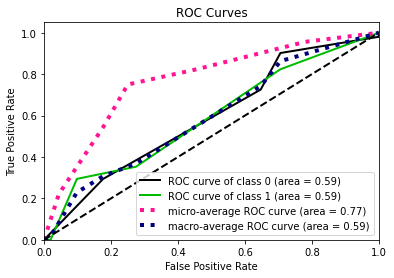

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

In [ ]:
# generate probability prediction
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.8,0.2
1,0.8,0.2
2,0.2,0.8
3,0.4,0.6
4,1.0,0.0


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.5905420991926182

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.2, 0.2, 0.8, 0.6, 0. , 0.6, 0.6, 0. , 0.2, 0.2])

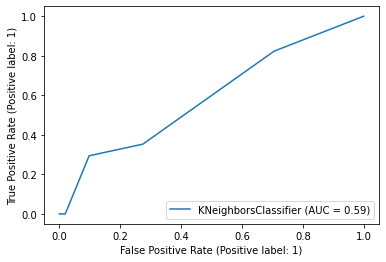

In [ ]:
metrics.RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)

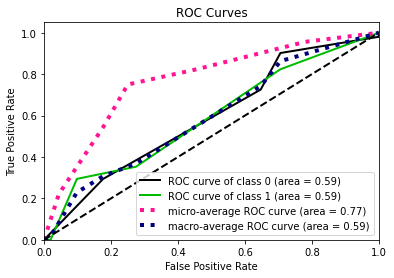

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

#### **Logistic Regression**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['Not Fraud','Fraud'], output_dict=True))

,Not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.761194,1.000000,0.764706,0.880597,0.820896
recall,1.000000,0.058824,0.764706,0.529412,0.764706
f1-score,0.864407,0.111111,0.764706,0.487759,0.676083
support,51.000000,17.000000,0.764706,68.000000,68.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



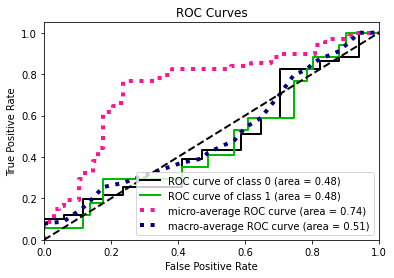

In [ ]:
skplt.metrics.plot_roc_curve(y_test, lr_pred_proba);

In [ ]:
# generate probability prediction
pred_proba_result = log_reg.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.780749,0.219251
1,0.843105,0.156895
2,0.544710,0.455290
3,0.691961,0.308039
4,0.857921,0.142079


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.47866205305651677

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.21925138, 0.15689451, 0.45529025, 0.30803907, 0.14207888,
       0.6107879 , 0.35715254, 0.29487525, 0.28403229, 0.22486433])

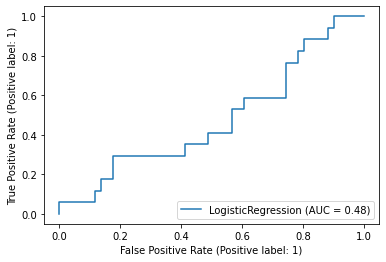

In [ ]:
metrics.RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



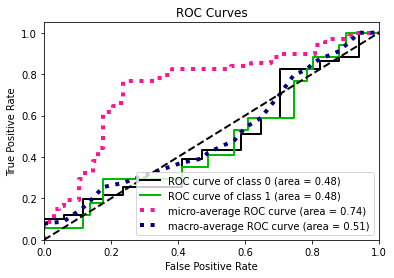

In [ ]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result)

#### **Random Forest**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Fraud','Fraud'], output_dict=True))

,Not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.750000,0.250000,0.720588,0.50000,0.625000
recall,0.941176,0.058824,0.720588,0.50000,0.720588
f1-score,0.834783,0.095238,0.720588,0.46501,0.649896
support,51.000000,17.000000,0.720588,68.00000,68.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



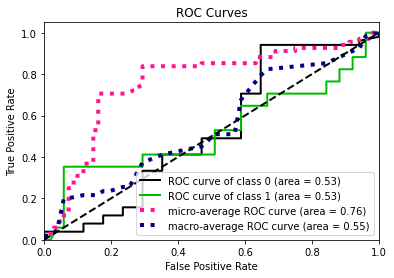

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

In [ ]:
# generate probability prediction
pred_proba_result = rf_clf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.743,0.257
1,0.680,0.320
2,0.670,0.330
3,0.736,0.264
4,0.751,0.249


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.5265282583621684

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.257, 0.32 , 0.33 , 0.264, 0.249, 0.345, 0.487, 0.169, 0.196,
       0.313])

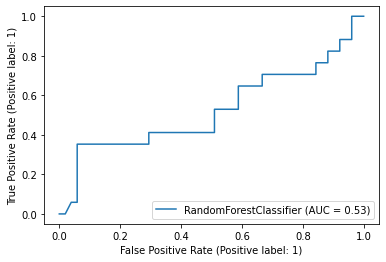

In [ ]:
metrics.RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)

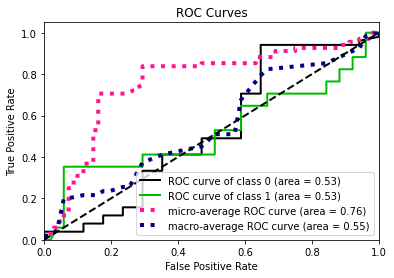

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

#### **XGBoost**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Fraud','Fraud'], output_dict=True))

,Not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.783333,0.500000,0.75,0.641667,0.712500
recall,0.921569,0.235294,0.75,0.578431,0.750000
f1-score,0.846847,0.320000,0.75,0.583423,0.715135
support,51.000000,17.000000,0.75,68.000000,68.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



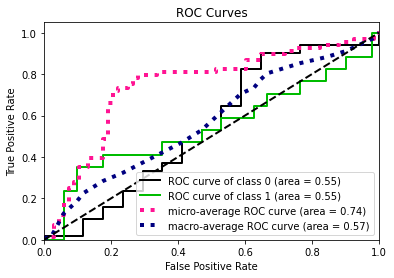

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

In [ ]:
# generate probability prediction
pred_proba_result = xgb_clf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.907250,0.092750
1,0.370901,0.629099
2,0.973502,0.026498
3,0.775377,0.224623
4,0.973118,0.026882


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.5455594002306805

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.09275043, 0.6290994 , 0.0264978 , 0.22462314, 0.02688206,
       0.3042968 , 0.9533585 , 0.00135006, 0.05476071, 0.09591957],
      dtype=float32)

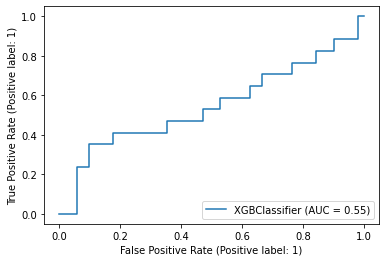

In [ ]:
metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

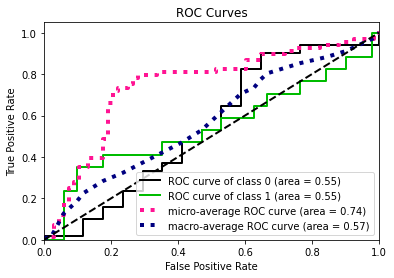

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

# Model Agnostic Methods

Dari ke-empat model yang telah diuji memiliki nilai akurasi sebagai berikut:

*   Logistic Regression 0.757
*   KNN 0.687
*   RF 0.727
*   XgBoost 0.727

Sehingga, model Linear Regression bisa merepresentasikan data dalam kasus ini karena memiliki nilai akurasi yang tinggi dibanding model lainnya.

In [ ]:
# Inititate Explainer for all models

## initiate explainer for Random Forest model
data_rf_exp = dx.Explainer(rf_clf, X_train, y_train, label = "Random Forest Interpretation")
## initiate explainer for Logistic Regression model
data_log_exp = dx.Explainer(log_reg, X_train, y_train, label = "Logistic Regression Interpretation")
## initiate explainer for KNN model
data_knn_exp = dx.Explainer(knn_clf, X_train, y_train, label = "KNN Interpretation")
## initiate explainer for XGBoost model
data_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 272 rows 28 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 272 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fef03a88290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



  -> predicted values  : min = 0.016, mean = 0.263, max = 0.849
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.232, mean = -0.00558, max = 0.328
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 272 rows 28 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 272 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic Regression Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fef03a88290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.13, mean = 0.262, max = 0.525
  -> model type        : classification will be used (default)
  -> residual f

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



## Feature Importance

In [ ]:
# visualize permutation feature importance for Random Forest Model
data_rf_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for KNN model
data_knn_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for XGBoost model
data_xgb_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for Logistics Regression model
data_log_exp.model_parts().plot()

Dari hasil variable importance pada model interpretasi Logistics Regression didapatkan faktor vehicle_claim memiliki nilai persentase yang paling tinggi sebesar 7.7%. Hal ini dirasa masuk akal karena pada awal nilai matriks korelasi pada vehicle_claim memiliki nilai yang tinggi sebesar 0.98. Jadi tingginya klaim pada kendaraan akan memperbesar peluang resiko klien untuk melakukan kasus fraud. Selain itu, faktor lainnya adalah premi tahunan yang dimiliki klien, klaim untuk mengobati luka-luka dan klaim untuk kerusakan properti. Faktor-faktor ini dirasa masuk akal dalam menambah jumlah kasus fraud karena klien bisa saja melakukan berbagai cara untuk mendapatkan klaim seperti faktor-faktor yang disebutkan tadi.

## Partial Dependence Plot

In [ ]:
# create partial dependence plot of Random Forest model
data_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 28/28 [00:47<00:00,  1.69s/it]


In [ ]:
# create partial dependence plot of KNN model
data_knn_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 28/28 [00:05<00:00,  5.25it/s]


In [ ]:
# create partial dependence plot of XGBoost model
data_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 28/28 [00:19<00:00,  1.44it/s]


In [ ]:
# create partial dependence plot of Logistic Regression model
data_log_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 28/28 [00:00<00:00, 47.12it/s]


Dari grafik partial dependence pada Logistic Regression secara umum menunjukkan kurva eksponesial yang ekstrim pada faktor-faktor yang dimiliki pada variable importance. Pada faktor vehicle_claim menunjukkan grafik yang sangat ekstrim dimana semakin tinggi harga klaim kendaraan maka semakin tinggi pula peluang untuk resiko fraud, begitu pun pada faktor property_claim. Namun, grafik berkebalikan ada pada variabel policy_annual_premium dimana semakin besar premi tahunan yang dibayarkan maka semakin kecil resiko klien dalam melakukan fraud. Mungkin dirasa masuk akal karena mereka yang membayar premi tahunan lebih mahal adalah mereka yang memiliki penghasilan yang besar sehingga mereka akan memandang asuransi sebagai investasi yang baik saat mereka terkena musibah sehingga mereka memiliki resiko fraud yang lebih rendah dibanding mereka yang membayar premi tahunan lebih murah. Hal yang sama terjadi pada variabel injury_claim dimana semakin tinggi injury_claim, mereka akan lebih berpikir lebih logis untuk menyakiti dirinya sendiri sehingga resiko fraudnya lebih rendah.

## Local Interpretable Model-Agnostic Explanation

In [ ]:
# define models explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['Not Fraud', 'Fraud'],
    discretize_continuous = True,
    verbose = True
)

In [ ]:
#User 527945
policy_number_527945 = X_train.iloc[317]
policy_number_527945

IndexError: ignored

In [ ]:
#User 235220
policy_number_235220 = X_train.iloc[97]
policy_number_235220

months_as_customer               230.00
age                               42.00
policy_state                       2.00
policy_deductable               1000.00
policy_annual_premium           1023.11
umbrella_limit                     0.00
insured_sex                        0.00
insured_education_level            1.00
insured_relationship               0.00
incident_type                      1.00
collision_type                     2.00
incident_severity                  0.00
authorities_contacted              0.00
incident_state                     1.00
incident_city                      3.00
incident_hour_of_the_day          13.00
number_of_vehicles_involved        3.00
property_damage                    0.00
bodily_injuries                    1.00
witnesses                          2.00
police_report_available            1.00
total_claim_amount             58850.00
injury_claim                   10700.00
property_claim                 10700.00
vehicle_claim                  37450.00


In [ ]:
#User 605100
policy_number_605100 = X_train.iloc[745]
policy_number_605100

IndexError: ignored

In [ ]:
# explain Random Forest prediction for user_id: 527945
lime_explainer.explain_instance(policy_number_527945, rf_clf.predict_proba).show_in_notebook(show_table=True)

# explain Random Forest prediction for user_id: 235220
lime_explainer.explain_instance(policy_number_235220, rf_clf.predict_proba).show_in_notebook(show_table=True)

# explain Random Forest prediction for user_id: 605100
lime_explainer.explain_instance(policy_number_605100, rf_clf.predict_proba).show_in_notebook(show_table=True)

NameError: ignored

In [ ]:
# explain KNN prediction for user_id: 527945
lime_explainer.explain_instance(policy_number_527945, knn_clf.predict_proba).show_in_notebook(show_table=True)

# explain KNN prediction for user_id: 235220
lime_explainer.explain_instance(policy_number_235220, knn_clf.predict_proba).show_in_notebook(show_table=True)

# explain KNN prediction for user_id: 605100
lime_explainer.explain_instance(policy_number_605100, knn_clf.predict_proba).show_in_notebook(show_table=True)

NameError: ignored

In [ ]:
# explain Logistic Regression prediction for user_id: 527945
lime_explainer.explain_instance(policy_number_527945, log_reg.predict_proba).show_in_notebook(show_table=True)

# explain Logistic Regression prediction for user_id: 235220
lime_explainer.explain_instance(policy_number_235220, log_reg.predict_proba).show_in_notebook(show_table=True)

# explain Logistic Regression prediction for user_id: 605100
lime_explainer.explain_instance(policy_number_605100, log_reg.predict_proba).show_in_notebook(show_table=True)

In [ ]:
# explain XGBoost prediction for user_id: 527945
lime_explainer.explain_instance(policy_number_527945, xgb_clf.predict_proba).show_in_notebook(show_table=True)

# explain XGBoost prediction for user_id: 235220
lime_explainer.explain_instance(policy_number_235220, xgb_clf.predict_proba).show_in_notebook(show_table=True)

# explain XGBoost prediction for user_id: 605100
lime_explainer.explain_instance(policy_number_605100, xgb_clf.predict_proba).show_in_notebook(show_table=True)

Berdasarkan hasil interpretasi LIME dengan model Logistic Regression menunjukkan klien dengan nomor 527945 terindikasi tidak melakukan fraud dengan probabilitas 76%. Hal ini dipengaruhi faktor policy_annual_premium dan injury_claim dengan magnitude yang rendah. Namun, ada kejanggalan pada interpretasi ini karena nilai vehicle claim dan total claim amount yang cukup tinggi magnitudenya. Dan ada terdapat nilai incident_hour_of_the_day sejumlah 1. Sehingga hasil ini belum dapat dijadikan patokan.

Sedangkan hasil interpretasi LIME dengan model Logistic Regression menunjukkan klien dengan nomor 235220 terindikasi tidak melakukan fraud dengan probabilitas 75%. Hal ini dipengaruhi faktor vehicle_claim dan property_claim dengan magnitude yang rendah. Selain itu nilai vehicle claim dan total claim amount juga tidak sebesar klien sebelumnya. Sehingga hasil ini mungkin dapat dijadikan patokan.